## Generate static graphs

These are the input parameters for the notebook. They will be automatically changed when the scripts to generate monthly statistics are run. You can modify them manually to generate multiple plots locally as well.

Pass in `None` to remove the filters and plot all data. This is not recommended for production settings, but might be useful for reports based on data snapshots.

In [1]:
year = 2020
month = 11
program = "prepilot"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

In [3]:
import scaffolding 
from plots import *

Connecting to database URL db


In [4]:
# Loading mapping dictionaries from mapping_dictionaries notebook

%store -r df_EI
%store -r dic_re
%store -r dic_pur
%store -r dic_fuel

# convert a dictionary to a defaultdict
dic_pur = defaultdict(lambda: 'Other',dic_pur)
dic_re = defaultdict(lambda: 'Other',dic_re)

In [5]:
dic_pur

defaultdict(<function __main__.<lambda>()>,
            {'work_travel': 'Work',
             'work': 'Work',
             'home': 'Home',
             'meal': 'Meal',
             'shopping': 'Shopping',
             'personal_med': 'Personal/Medical',
             'exercise': 'Recreation/Exercise',
             'transit_transfer': 'Transit transfer',
             'pick_drop': 'Pick-up/Drop off',
             'entertainment': 'Entertainment/Social',
             'car_mechanic': 'Other',
             'school': 'School',
             'revisado_bike': 'Other',
             'placas_de carro': 'Other',
             'community_walk': 'Entertainment/Social',
             'gardening': 'Entertainment/Social',
             'visiting': 'Entertainment/Social',
             'church': 'Religious',
             'community_garden': 'Entertainment/Social',
             'community_meeting': 'Entertainment/Social',
             'visit_a friend': 'Entertainment/Social',
             'aseguranza': 'Other',

In [6]:
tq = scaffolding.get_time_query(year, month)

In [7]:
participant_ct_df = scaffolding.load_all_participant_trips(program, tq)

[UUID('576e37c7-ab7e-4c03-add7-02486bc3f42e'),
 UUID('8b563348-52b3-4e3e-b046-a0aaf4fcea15'),
 UUID('5079bb93-c9cf-46d7-a643-dfc86bb05605'),
 UUID('feabfccd-dd6c-4e8e-8517-9d7177042483'),
 UUID('113aef67-400e-4e21-a29f-d04e50fc42ea'),
 UUID('c8b9fe22-86f8-449a-b64f-c18a8d20eefc'),
 UUID('e7b24d99-324d-4d6d-b247-9edc87d3c848'),
 UUID('1044195f-af9e-43d4-9407-60594e5e9938'),
 UUID('898b1a5e-cdd4-4a0c-90e4-942fa298e456'),
 UUID('1d292b85-c549-409a-a10d-746e957582a0'),
 UUID('cb3222a7-1e72-4a92-8b7b-2c4795402497'),
 UUID('efdbea3b-eef6-48fc-9558-7585f4ad6f24'),
 UUID('960835ac-9d8a-421d-8b8a-bf816f8a4b92')]

Loaded all confirmed trips of length 953


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,11,2,17,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,11,5,12,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,11,5,12,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,11,5,12,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,11,5,13,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09


After filtering, found 953 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,11,2,17,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,11,5,12,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,11,5,12,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,11,5,12,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,11,5,13,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09


In [8]:
labeled_ct = scaffolding.filter_labeled_trips(participant_ct_df)

After filtering, found 548 labeled trips


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,11,2,17,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,11,5,12,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,11,5,12,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,11,5,12,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,11,5,13,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09


In [9]:
expanded_ct = scaffolding.expand_userinputs(labeled_ct)

,mode_confirm,purpose_confirm,replaced_mode
0,walk,meal,same_mode
1,train,personal_med,same_mode
2,skateboard,transit_transfer,bus
3,not_a_trip,transit_transfer,same_mode
4,not_a_trip,transit_transfer,same_mode


After expanding, columns went from 33 -> 36


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09,walk,meal,same_mode
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,train,personal_med,same_mode
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,skateboard,transit_transfer,bus
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,not_a_trip,transit_transfer,same_mode
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09,not_a_trip,transit_transfer,same_mode


In [10]:
expanded_ct = scaffolding.data_quality_check(expanded_ct)
expanded_ct.shape

(519, 36)

In [11]:
## Mapping new labels with dictionaries
expanded_ct['Trip_purpose']= expanded_ct['purpose_confirm'].map(dic_pur)
expanded_ct['Mode_confirm']= expanded_ct['mode_confirm'].map(dic_re)
expanded_ct['Replaced_mode']= expanded_ct['replaced_mode'].map(dic_re)

#Mapping fuel
expanded_ct['Mode_confirm_fuel']= expanded_ct['Mode_confirm'].map(dic_fuel)
expanded_ct['Replaced_mode_fuel']= expanded_ct['Replaced_mode'].map(dic_fuel)

In [12]:
scaffolding.unit_conversions(expanded_ct)

In [13]:
file_suffix = scaffolding.get_file_suffix(year, month, program)
quality_text = scaffolding.get_quality_text(participant_ct_df, expanded_ct)

_2020_11_prepilot
Based on 519 confirmed trips from 12 users
of 953 total trips from 12 users (54.46%)


# Energy Impact (kWH) Calculation

In [14]:
expanded_ct = scaffolding.energy_intensity(expanded_ct, df_EI, 'distance','Replaced_mode', 'Mode_confirm')
expanded_ct = scaffolding.energy_impact_kWH(expanded_ct, 'distance_miles','Replaced_mode', 'Mode_confirm')

# Distance vs. Energy_Impact (kWH) by Mode_confirm

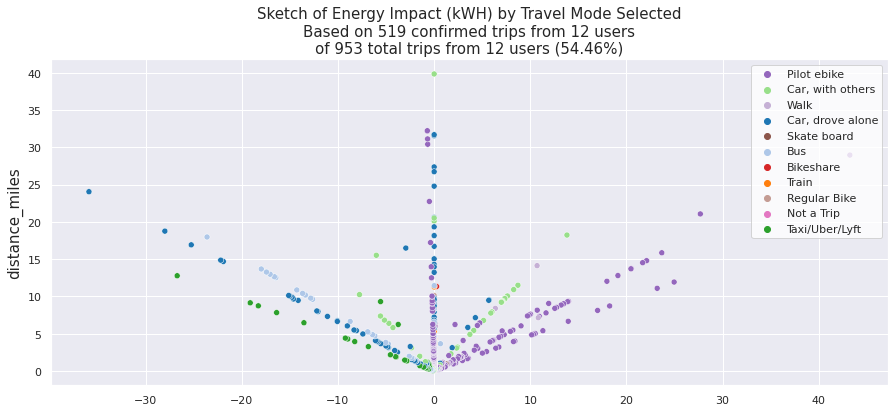

In [15]:
data=expanded_ct.loc[(expanded_ct['distance_miles'] <= 40)].sort_values(by=['Energy_Impact(kWH)'], ascending=False)   
x='Energy_Impact(kWH)'
y='distance_miles'
legend ='Mode_confirm'
plot_title="Sketch of Energy Impact (kWH) by Travel Mode Selected\n%s" % quality_text
file_name ='sketch_distance_energy_impact%s.png' % file_suffix
distancevsenergy(data,x,y,legend,plot_title,file_name)

# Energy_Impact (kWH)

In [16]:
#eirp : energy impact replaced_mode
eirc=expanded_ct.groupby('Replaced_mode').agg({'Energy_Impact(kWH)': ['sum', 'mean']},)
eirc.columns = ['Sketch of Total Energy_Impact(kWH)', 'Sketch of Average Energy_Impact(kWH)']
eirc = eirc.reset_index()
eirc = eirc.sort_values(by=['Sketch of Total Energy_Impact(kWH)'], ascending=False)
eirc['boolean'] = eirc['Sketch of Total Energy_Impact(kWH)'] > 0

#eimc : energy impact mode_confirm
eimc=expanded_ct.groupby('Mode_confirm').agg({'Energy_Impact(kWH)': ['sum', 'mean']},)
eimc.columns = ['Sketch of Total Energy_Impact(kWH)', 'Sketch of Average Energy_Impact(kWH)']
eimc = eimc.reset_index()
eimc = eimc.sort_values(by=['Sketch of Total Energy_Impact(kWH)'], ascending=False)


subset1 = eirc [['Replaced_mode', 'Sketch of Total Energy_Impact(kWH)']].copy()
subset1.rename(columns = {'Replaced_mode':'Transport Mode','Sketch of Total Energy_Impact(kWH)':'Replaced_Mode' }, inplace=True)

subset2 = eimc [['Mode_confirm', 'Sketch of Total Energy_Impact(kWH)']].copy()
subset2.rename(columns = {'Mode_confirm':'Transport Mode','Sketch of Total Energy_Impact(kWH)':'Mode_Confirm' }, inplace=True)

df_plot = pd.merge(subset1, subset2, on="Transport Mode")
df = pd.melt(df_plot , id_vars=['Transport Mode'], value_vars=['Replaced_Mode','Mode_Confirm'], var_name='selection')
df.rename(columns = {'value':'Energy Impact (kWH)'}, inplace = True)

In [17]:
df

,Transport Mode,selection,Energy Impact (kWH)
0,"Car, drove alone",Replaced_Mode,576.807
1,Taxi/Uber/Lyft,Replaced_Mode,221.614
2,Bus,Replaced_Mode,99.372
3,"Car, with others",Replaced_Mode,35.104
4,Not a Trip,Replaced_Mode,0.000
5,Skate board,Replaced_Mode,0.000
6,Train,Replaced_Mode,-3.628
7,Regular Bike,Replaced_Mode,-4.133
8,Walk,Replaced_Mode,-90.614
9,Pilot ebike,Replaced_Mode,-674.651


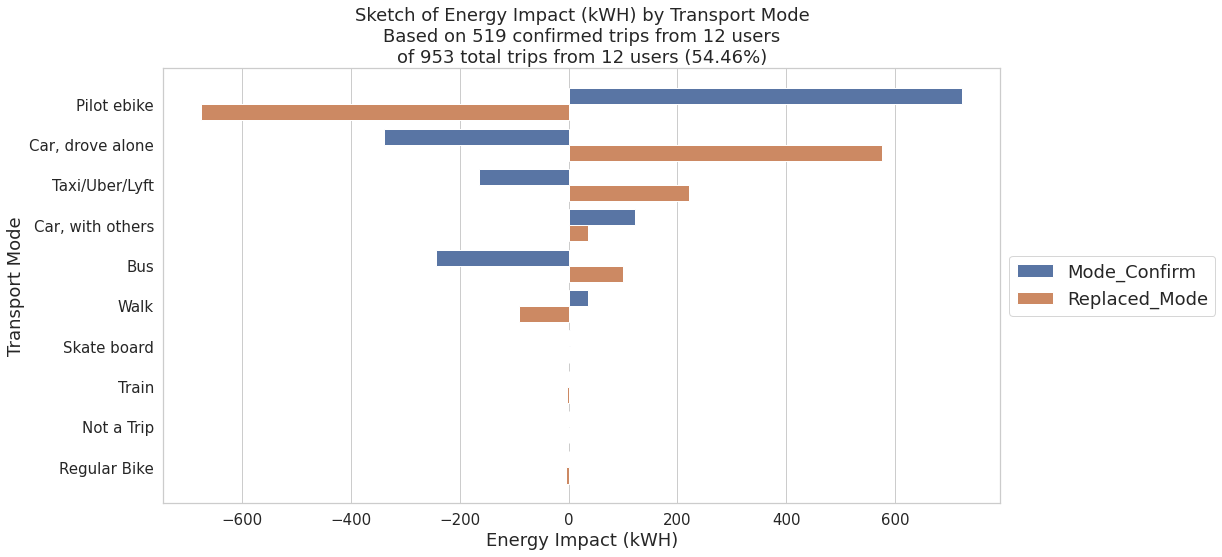

In [18]:
df= df.sort_values(by=['Energy Impact (kWH)'], ascending=False)
x= 'Energy Impact (kWH)'
y= 'Transport Mode'
color = 'selection'
plot_title="Sketch of Energy Impact (kWH) by Transport Mode\n%s" % quality_text
file_name ='sketch_all_energy_impact%s.png' % file_suffix
overeall_energy_impact(x,y,color,df,plot_title,file_name)

# Sketch of Total Energy_Impact (kWH) by Replaced_mode

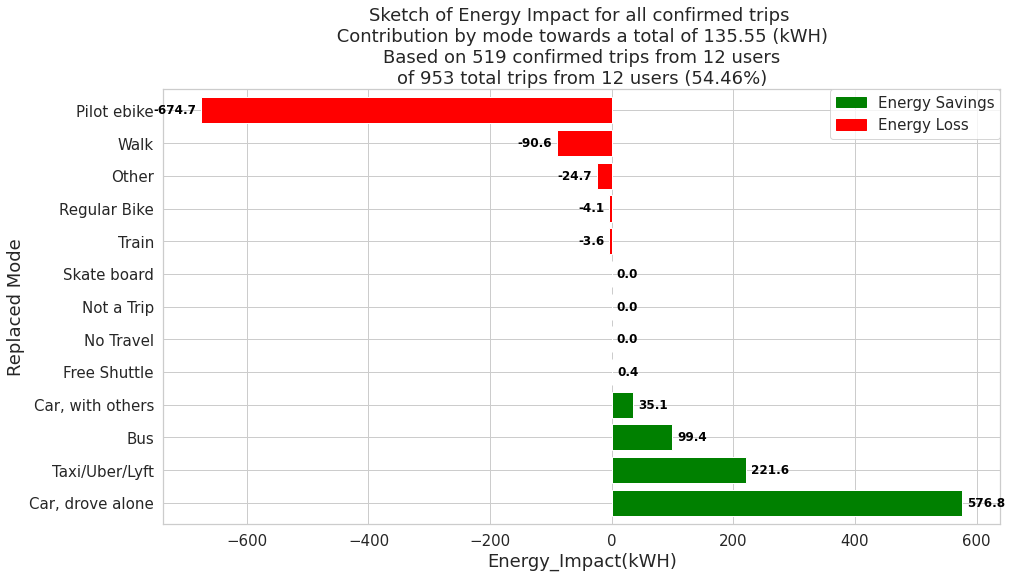

In [19]:
net_energy_saved = round(sum(eirc['Sketch of Total Energy_Impact(kWH)']), 2)

x = eirc['Sketch of Total Energy_Impact(kWH)']
y = eirc['Replaced_mode']
color =eirc['boolean']

plot_title="Sketch of Energy Impact for all confirmed trips \n Contribution by mode towards a total of %s (kWH) \n%s" % (net_energy_saved, quality_text)
file_name ='sketch_all_mode_energy_impact%s.png' % file_suffix
energy_impact(x,y,color,plot_title,file_name)

# Sketch of Energy Impact by E-bike trips

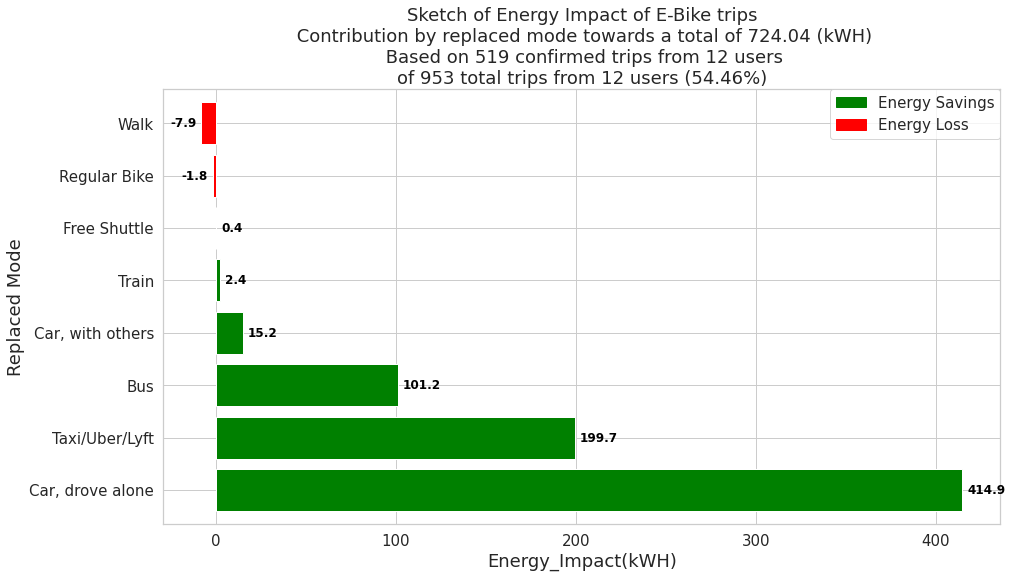

In [20]:
data_eb = expanded_ct.query("Mode_confirm == 'Pilot ebike'")
# ebei : ebike energy impact
ebei=data_eb.groupby('Replaced_mode').agg({'Energy_Impact(kWH)': ['sum', 'mean']},)
ebei.columns = ['Sketch of Total Energy_Impact(kWH)', 'Sketch of Average Energy_Impact(kWH)']
ebei= ebei.reset_index()
ebei = ebei.sort_values(by=['Sketch of Total Energy_Impact(kWH)'], ascending=False)
ebei['boolean'] = ebei['Sketch of Total Energy_Impact(kWH)'] > 0
net_energy_saved = round(sum(ebei['Sketch of Total Energy_Impact(kWH)']), 2)

x = ebei['Sketch of Total Energy_Impact(kWH)']
y = ebei['Replaced_mode']
color =ebei['boolean']

plot_title="Sketch of Energy Impact of E-Bike trips\n Contribution by replaced mode towards a total of %s (kWH)\n %s" % (net_energy_saved, quality_text)
file_name ='sketch_energy_impact_ebike%s.png' % file_suffix
energy_impact(x,y,color,plot_title,file_name)

# CO2 Emissions (lb) Calculation

In [ ]:
expanded_ct = scaffolding.CO2_impact_lb(expanded_ct,'distance_miles','Replaced_mode', 'Mode_confirm')

# Sketch of Total CO2 Emissions by Replaced_mode

In [ ]:
co2rp=expanded_ct.groupby('Replaced_mode').agg({'CO2_Impact(lb)': ['sum', 'mean']},)
co2rp.columns = ['total_lb_CO2_emissions', 'average_lb_CO2_emission']
co2rp = co2rp.reset_index()
co2rp= co2rp.sort_values(by=['total_lb_CO2_emissions'], ascending=False)
co2rp['boolean'] = co2rp['total_lb_CO2_emissions'] > 0


net_CO2_saved = round(sum(co2rp['total_lb_CO2_emissions']), 2)

x = co2rp['total_lb_CO2_emissions']
y = co2rp['Replaced_mode']
color =co2rp['boolean']

plot_title="Sketch of CO2 Emissions Impact for all confirmed trips \n Contribution by mode towards a total of %s (kWH) \n%s" % (net_CO2_saved, quality_text)
file_name ='sketch_all_mode_CO2impact%s.png' % file_suffix
CO2_impact(x,y,color,plot_title,file_name)

# Sketch of  CO2 Emissions Impact by E-bike trips

In [ ]:
data_eb = expanded_ct.query("Mode_confirm == 'Pilot ebike'")

ebco2=data_eb.groupby('Replaced_mode').agg({'CO2_Impact(lb)': ['sum', 'mean']},)
ebco2.columns = ['total_lb_CO2_emissions', 'average_lb_CO2_emission']
ebco2 = ebco2.reset_index()
ebco2 = ebco2.sort_values(by=['total_lb_CO2_emissions'], ascending=False)
ebco2['boolean'] = ebco2['total_lb_CO2_emissions'] > 0
net_CO2_emissions = round(sum(ebco2['total_lb_CO2_emissions']), 2)

x = ebco2['total_lb_CO2_emissions']
y = ebco2['Replaced_mode']
color = ebco2['boolean']

plot_title="Sketch of Total Pounds of CO2 Emissions of E-Bike trips\n Contribution by replaced mode towards a total of %s (lb CO2 Emissions )\n %s" % (net_CO2_emissions, quality_text)
file_name ='sketch_CO2impact_ebike%s.png' % file_suffix
CO2_impact(x,y,color,plot_title,file_name)